# Data Exploration & Feature Engineering

In this notebook, we will explore the datasets provided for the project. We will load the data, check for missing values, and understand the structure of the files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

## List Data Files

In [2]:
data_dir = '../data'
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/X_test.joblib
../data/reviews.csv
../data/test_ids.joblib
../data/test.csv
../data/y.joblib
../data/calendar.csv
../data/train.csv
../data/sample_submission.csv
../data/X.joblib


## Load Datasets

In [3]:
try:
    train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
    test_df = pd.read_csv(os.path.join(data_dir, 'test.csv'))
    reviews_df = pd.read_csv(os.path.join(data_dir, 'reviews.csv'))
    calendar_df = pd.read_csv(os.path.join(data_dir, 'calendar.csv'))
    sample_submission_df = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))
    print("All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")

All datasets loaded successfully.


## Explore Train Data

In [4]:
print("Train Data Shape:", train_df.shape)
display(train_df.head())

Train Data Shape: (24153, 58)


,Unnamed: 0.1,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,0,25436,https://www.airbnb.com/rooms/25436,20250627144659,2025-06-28,previous scrape,In the forest Sea view Two minutes to the city.,Our house is in Baby Koru. If you want village...,Clean and elegand friends . U can find everyth...,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,https://www.airbnb.com/users/show/105823,Yesim,2010-04-09,"İstanbul, Turkey","Merhabalar . Kuş sesi , akan su sesi ile uyan...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/067a8...,https://a0.muscache.com/im/pictures/user/067a8...,Beşiktaş,1.0,1.0,"['email', 'phone']",t,t,"Beşiktaş/ bebek, İstanbul, Turkey",Besiktas,NaN,41.078830,29.038630,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,NaN,"[""Room-darkening shades"", ""Wine glasses"", ""Sel...",NaN,100,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
1,1,1,34177,https://www.airbnb.com/rooms/34177,20250627144659,2025-07-01,city scrape,PETIT HOUSE,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,https://www.airbnb.com/users/show/147330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Beşiktaş, İstanbul, Turkey",Besiktas,NaN,41.066810,29.040350,Entire home,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Free dryer \u2013 In unit"", ""Extra pillows a...","1,794.00",100,365,4.69,4.69,4.88,4.88,4.81,4.69,4.81,NaN,f,5,5,0,0
2,2,2,42835,https://www.airbnb.com/rooms/42835,20250627144659,2025-06-28,previous scrape,Cozy apartment in the heart of Istanbul,Welcome to our cozy 2-bedroom apartment locate...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,187026,https://www.airbnb.com/users/show/187026,Attila,2010-07-31,"Istanbul, Turkey",I am from Istanbul/ Turkey. I will do my best ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/187026/profil...,https://a0.muscache.com/im/users/187026/profil...,Şişli,3.0,3.0,"['email', 'phone']",t,t,NaN,Sisli,NaN,41.043030,28.985310,Entire rental unit,Entire home/apt,4,NaN,2 baths,1.0,NaN,"[""Wine glasses"", ""Laundromat nearby"", ""Cleanin...",NaN,100,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,1,2,0
3,3,3,73477,https://www.airbnb.com/rooms/73477,20250627144659,2025-07-01,city scrape,Sea View Apartment in Taksim/ Center of Istanbul,Sea View Apartment in Taksim/ Center of Istanbul,Gumussuyu,https://a0.muscache.com/pictures/409813ff-21c0...,383789,https://www.airbnb.com/users/show/383789,Berat,2011-02-09,"İstanbul, Turkey",Im a young professional who lives both in Ista...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Taksim,2.0,2.0,"['email', 'phone']",t,t,"Beyoğlu, İstanbul, Turkey",Beyoglu,NaN,41.034447,28.987555,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Window AC unit"", ""Extra pillows and blankets...","2,331.00",100,360,5.00,5.00,4.82,5.00,5.00,5.00,4.91,NaN,f,2,2,0,0
4,4,4,77292,https://www.airbnb.com/rooms/77292,20250627144659,2025-06-30,previous scrape,3 Bedroom Apartmen

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  24153 non-null  int64  
 1   Unnamed: 0                                    24153 non-null  int64  
 2   id                                            24153 non-null  int64  
 3   listing_url                                   24153 non-null  object 
 4   scrape_id                                     24153 non-null  int64  
 5   last_scraped                                  24153 non-null  object 
 6   source                                        24153 non-null  object 
 7   name                                          24153 non-null  object 
 8   description                                   23501 non-null  object 
 9   neighborhood_overview                         6905 non-null  

In [6]:
train_df.describe()

,Unnamed: 0.1,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,24153.000000,24153.000000,2.415300e+04,2.415300e+04,2.415300e+04,23485.000000,23485.000000,0.0,24153.000000,24153.000000,24153.000000,20839.000000,23639.000000,20871.000000,24153.000000,24153.000000,15052.000000,15050.000000,15052.000000,15050.000000,15052.000000,15050.000000,15049.000000,24153.000000,24153.000000,24153.000000,24153.000000
mean,12076.000000,14850.732621,8.485073e+17,2.025063e+13,3.512887e+08,26.026570,29.657654,NaN,41.029320,28.972679,3.538981,1.212630,1.521384,2.095875,58.221380,470.528878,4.582673,4.615631,4.536973,4.720405,4.740084,4.644599,4.541681,23.771830,21.446156,2.179522,0.033039
std,6972.514862,8554.309302,4.721010e+17,4.578220e+00,2.045644e+08,82.050365,100.810116,NaN,0.048364,0.154331,2.177697,0.901427,1.643558,2.204290,61.847969,310.405535,0.691445,0.666244,0.708628,0.612142,0.597183,0.595877,0.684091,79.558098,79.817644,5.484710,0.300686
min,0.000000,0.000000,2.543600e+04,2.025063e+13,1.058230e+05,1.000000,1.000000,NaN,40.815460,28.007570,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6038.000000,7445.000000,6.634897e+17,2.025063e+13,1.659560e+08,2.000000,2.000000,NaN,41.005032,28.965280,2.000000,1.000000,1.000000,1.000000,2.000000,365.000000,4.510000,4.570000,4.470000,4.750000,4.770000,4.570000,4.500000,1.000000,1.000000,0.000000,0.000000
50%,12076.000000,14932.000000,9.490009e+17,2.025063e+13,4.110136e+08,5.000000,7.000000,NaN,41.031507,28.980280,3.000000,1.000000,1.000000,2.000000,100.000000,365.000000,4.800000,4.830000,4.760000,4.920000,4.940000,4.830000,4.740000,5.000000,2.000000,0.000000,0.000000
75%,18114.000000,22277.000000,1.233129e+18,2.025063e+13,5.085327e+08,14.000000,17.000000,NaN,41.048843,29.004379,4.000000,1.000000,2.000000,3.000000,100.000000,365.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.940000,13.000000,10.000000,2.000000,0.000000
max,24152.000000,29636.000000,1.452164e+18,2.025063e+13,7.034169e+08,750.000000,5373.000000,NaN,41.486680,29.870790,16.000000,50.000000,50.000000,54.000000,999.000000,9999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,530.000000,530.000000,60.000000,8.000000


In [7]:
print("Missing Values in Train Data:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Missing Values in Train Data:
description                       652
neighborhood_overview           17248
host_name                         660
host_since                        668
host_location                    8794
host_about                      14797
host_response_time               8186
host_response_rate               8186
host_acceptance_rate             7207
host_is_superhost                 480
host_thumbnail_url                668
host_picture_url                  668
host_neighbourhood              21544
host_listings_count               668
host_total_listings_count         668
host_verifications                668
host_has_profile_pic              668
host_identity_verified            668
neighbourhood                   17248
neighbourhood_group_cleansed    24153
bathrooms                        3314
bathrooms_text                    104
bedrooms                          514
beds                             3282
price                            3349
review_scores_rating

## Explore Test Data

In [8]:
print("Test Data Shape:", test_df.shape)
display(test_df.head())

Test Data Shape: (4750, 56)


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,536526,https://www.airbnb.com/rooms/536526,20250627144659,2025-07-01,city scrape,"A Lovely, Modern, 1bd Apt in Center",This is the top floor flat of my historical bu...,"It is a very central place, walking distance t...",https://a0.muscache.com/pictures/18523966/0e7c...,2248444,https://www.airbnb.com/users/show/2248444,Pinar,2012-04-29,"Bonn, Germany",I am an urban planner and bought a historical ...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/2248444/profi...,https://a0.muscache.com/im/users/2248444/profi...,Taksim,4.0,9.0,"['email', 'phone']",t,t,"İstanbul, Istanbul, Turkey",Beyoglu,NaN,41.03806,28.97582,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Window AC unit"", ""Extra pillows and blankets...",2,1095,4.62,4.72,4.73,4.78,4.88,4.13,4.40,34-1331,t,4,3,1,0
1,1,124137,https://www.airbnb.com/rooms/124137,20250627144659,2025-07-01,city scrape,Beautiful Artist's home staycation,"Welcome to your home in Istanbul, an artistica...",The apartment is at the heart of Istanbul's vi...,https://a0.muscache.com/pictures/miso/Hosting-...,594053,https://www.airbnb.com/users/show/594053,Devrim,2011-05-16,"İstanbul, Turkey",I was born and raised in Istanbul. After compl...,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/e03cb...,https://a0.muscache.com/im/pictures/user/e03cb...,Taksim,1.0,3.0,"['email', 'phone']",t,t,"İstanbul, Istanbul, Turkey",Beyoglu,NaN,41.03451,28.98654,Entire rental unit,Entire home/apt,6,1.0,1 bath,3.0,4.0,"[""Window AC unit"", ""Extra pillows and blankets...",100,365,4.85,4.91,4.91,4.84,4.91,4.83,4.80,NaN,t,1,1,0,0
2,2,164216,https://www.airbnb.com/rooms/164216,20250627144659,2025-07-01,city scrape,Ottoman Flat 2BR @Taksim Square,NaN,The Taksim district is certainly alive. The de...,https://a0.muscache.com/pictures/14430623/3b7c...,783470,https://www.airbnb.com/users/show/783470,Aslinaz,2011-07-06,"Istanbul, Turkey",After a pretty long HR career I moved in Londo...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/783470/profil...,https://a0.muscache.com/im/users/783470/profil...,Taksim,3.0,4.0,"['email', 'phone']",t,t,"Taksim, Istanbul, Turkey",Beyoglu,NaN,41.03757,28.98327,Entire rental unit,Entire home/apt,6,1.0,1 bath,2.0,5.0,"[""Elevator"", ""Hair dryer"", ""Luggage dropoff al...",100,365,4.30,4.28,4.31,4.72,4.78,4.50,4.19,NaN,f,3,3,0,0
3,3,541629,https://www.airbnb.com/rooms/541629,20250627144659,2025-06-28,city scrape,Apartment flat entrance - Beyoglu,NaN,NaN,https://a0.muscache.com/pictures/7551372/81550...,2464199,https://www.airbnb.com/users/show/2464199,Fahrettin,2012-05-25,"Istanbul, Turkey",Istanbul is a beautiful city; the district Bey...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/2464199/profi...,https://a0.muscache.com/im/users/2464199/profi...,Karaköy,5.0,6.0,"['email', 'phone']",t,t,NaN,Beyoglu,NaN,41.03025,28.97029,Entire rental unit,Entire home/apt,5,1.0,1 bath,2.0,2.0,"[""Room-darkening shades"", ""Window guards"", ""Ha...",100,1125,4.00,3.88,3.71,4.35,4.35,4.18,4.00,NaN,f,5,

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    4750 non-null   int64  
 1   id                                            4750 non-null   int64  
 2   listing_url                                   4750 non-null   object 
 3   scrape_id                                     4750 non-null   int64  
 4   last_scraped                                  4750 non-null   object 
 5   source                                        4750 non-null   object 
 6   name                                          4750 non-null   object 
 7   description                                   4620 non-null   object 
 8   neighborhood_overview                         1240 non-null   object 
 9   picture_url                                   4750 non-null   o

In [10]:
print("Missing Values in Test Data:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Missing Values in Test Data:
description                      130
neighborhood_overview           3510
host_name                        109
host_since                       109
host_location                   1795
host_about                      3068
host_response_time              1538
host_response_rate              1538
host_acceptance_rate            1367
host_is_superhost                 81
host_thumbnail_url               109
host_picture_url                 109
host_neighbourhood              4356
host_listings_count              109
host_total_listings_count        109
host_verifications               109
host_has_profile_pic             109
host_identity_verified           109
neighbourhood                   3510
neighbourhood_group_cleansed    4750
bathrooms                         19
bathrooms_text                    19
bedrooms                          22
beds                              14
review_scores_rating            1874
review_scores_accuracy          1874
review_sc

## Explore Reviews Data

In [11]:
print("Reviews Data Shape:", reviews_df.shape)
display(reviews_df.head())

Reviews Data Shape: (516034, 2)


,listing_id,date
0,34177,2015-12-29
1,34177,2016-01-19
2,34177,2016-02-19
3,34177,2016-02-27
4,34177,2016-05-03


In [12]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516034 entries, 0 to 516033
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  516034 non-null  int64 
 1   date        516034 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.9+ MB


## Explore Calendar Data

In [13]:
print("Calendar Data Shape:", calendar_df.shape)
display(calendar_df.head())

Calendar Data Shape: (10817505, 5)


,listing_id,date,available,minimum_nights,maximum_nights
0,25436,2025-06-28,f,100,160
1,25436,2025-06-29,f,100,160
2,25436,2025-06-30,f,100,160
3,25436,2025-07-01,f,100,160
4,25436,2025-07-02,f,100,160


In [14]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817505 entries, 0 to 10817504
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   minimum_nights  int64 
 4   maximum_nights  int64 
dtypes: int64(3), object(2)
memory usage: 412.7+ MB


## Explore Sample Submission

In [15]:
print("Sample Submission Shape:", sample_submission_df.shape)
display(sample_submission_df.head())

Sample Submission Shape: (4750, 2)


,ID,TARGET
0,536526,NaN
1,124137,NaN
2,164216,NaN
3,541629,NaN
4,572504,NaN


# Data Cleaning & Further Exploration

In [16]:
# Clean 'price' column in Train Data
if 'price' in train_df.columns:
    # Remove '$' and ',' and convert to float
    train_df['price'] = train_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    print("Price column cleaned and converted to float.")
    
    # Display basic statistics for Price
    print(train_df['price'].describe())

Price column cleaned and converted to float.
count    2.080400e+04
mean     4.523767e+03
std      4.016376e+04
min      8.000000e+01
25%      1.580750e+03
50%      2.493000e+03
75%      3.956000e+03
max      4.250147e+06
Name: price, dtype: float64


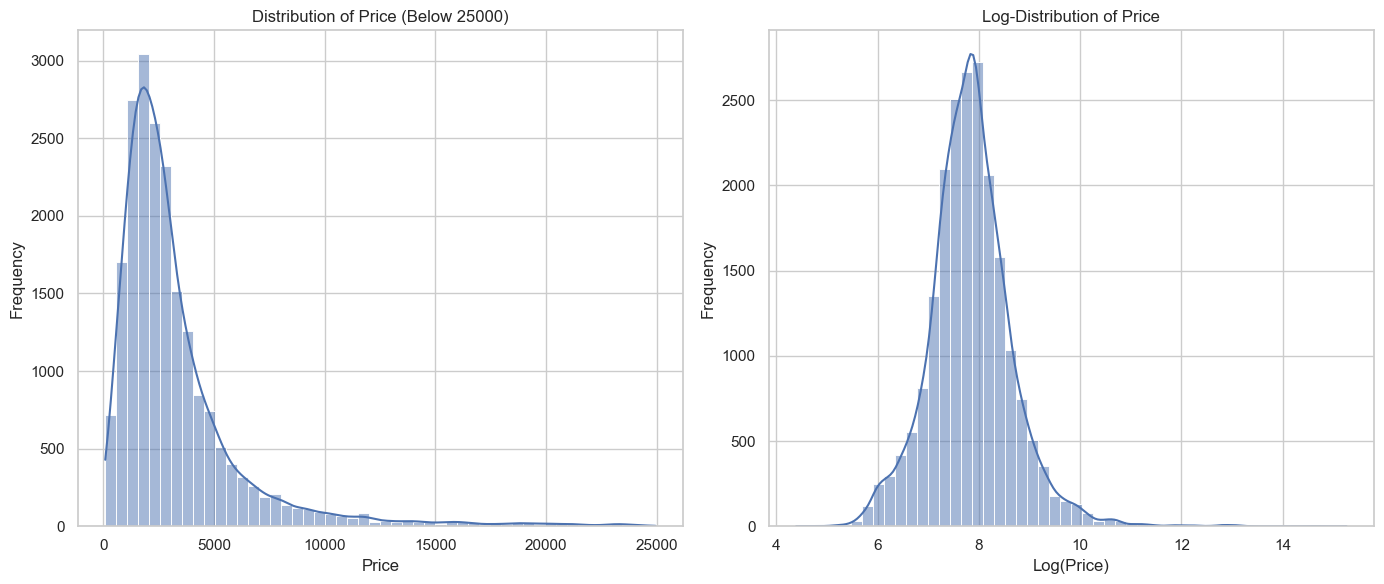

In [17]:
# Visualize Price Distribution
# Since the price distribution is highly skewed with extreme outliers (max ~4M vs median ~2.5k),
# we will visualize it in two ways:
# 1. Capping outliers (e.g., showing only up to the 99th percentile)
# 2. Using a log scale

plt.figure(figsize=(14, 6))

# Plot 1: Price Distribution (99th Percentile)
plt.subplot(1, 2, 1)
upper_limit = train_df['price'].quantile(0.99)
sns.histplot(train_df[train_df['price'] < upper_limit]['price'], bins=50, kde=True)
plt.title(f'Distribution of Price (Below {upper_limit:.0f})')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot 2: Log-Price Distribution
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(train_df['price']), bins=50, kde=True)
plt.title('Log-Distribution of Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

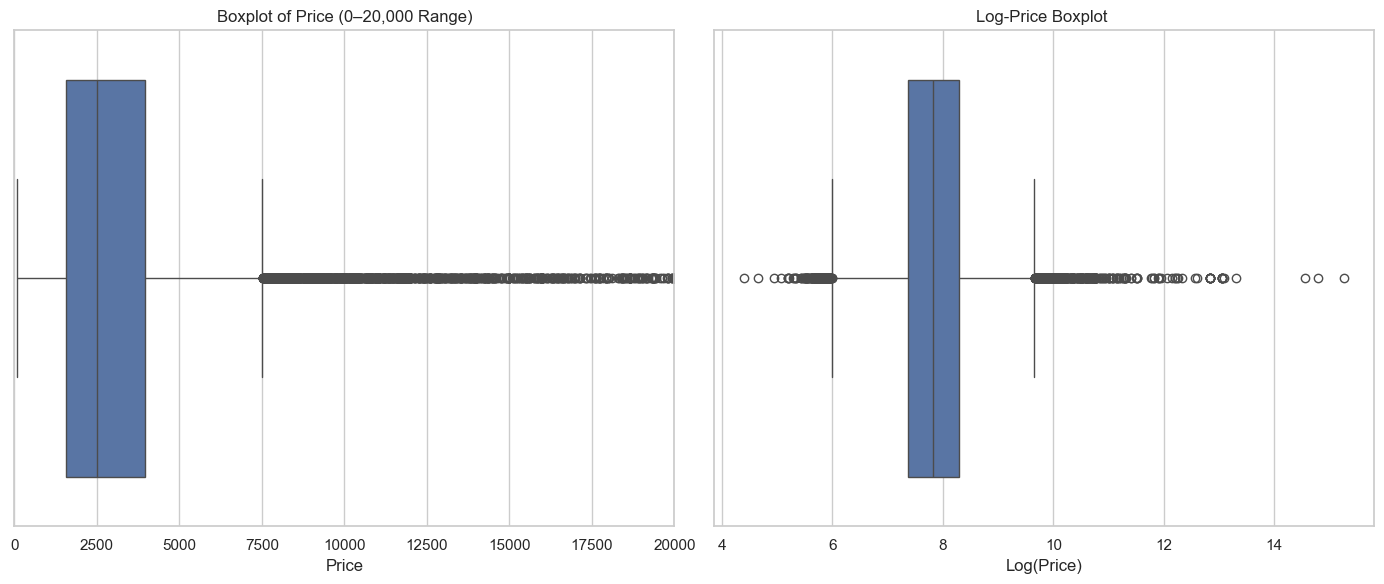

In [18]:
# Boxplots for outlier detection
plt.figure(figsize=(14, 6))
# Log-transformed price
train_df['log_price'] = np.log1p(train_df['price'])
# Boxplot of Price (Zoomed)
plt.subplot(1, 2, 1)
sns.boxplot(x=train_df['price'])
plt.xlim(0, 20000)
plt.title("Boxplot of Price (0–20,000 Range)")
plt.xlabel("Price")

# Log-price Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['log_price'])
plt.title("Log-Price Boxplot ")
plt.xlabel("Log(Price)")

plt.tight_layout()
plt.show()

## Removing Extreme Price Outliers (Top 1%)

In [19]:
# Remove top 1% extreme price outliers
q_high = train_df['price'].quantile(0.99)
train_df = train_df[train_df['price'] <= q_high]

print("After removing top 1% price outliers:", train_df.shape)

# Recompute log-price after filtering
train_df['log_price'] = np.log1p(train_df['price'])


After removing top 1% price outliers: (20598, 59)


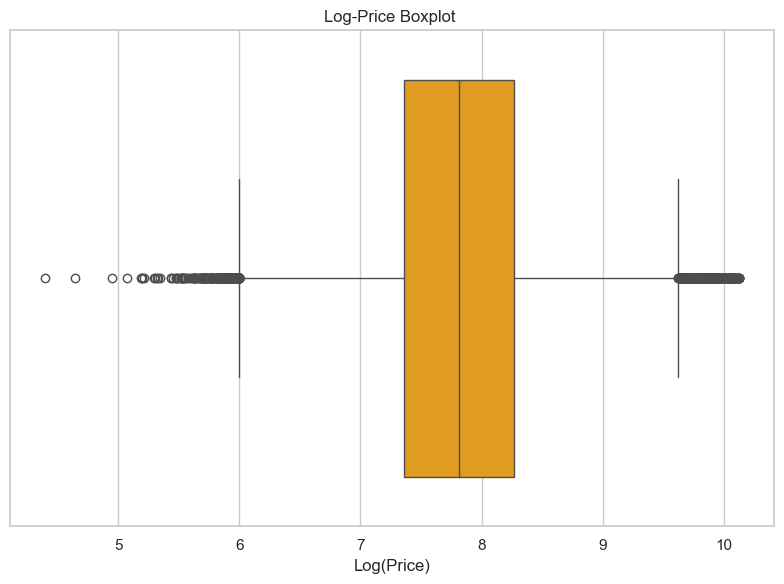

New Maximum Price: 25000.0


In [20]:
plt.figure(figsize=(8, 6))

# Log-price Boxplot after removing 1% outliers

sns.boxplot(x=train_df['log_price'],color = "orange")
plt.title("Log-Price Boxplot ")
plt.xlabel("Log(Price)")

plt.tight_layout()
plt.show()

print(f"New Maximum Price: {train_df['price'].max()}")


In [21]:
# Check Date Ranges in Calendar and Reviews
print("Calendar Date Range:", calendar_df['date'].min(), "to", calendar_df['date'].max())
print("Reviews Date Range:", reviews_df['date'].min(), "to", reviews_df['date'].max())

Calendar Date Range: 2025-06-27 to 2026-07-01
Reviews Date Range: 2011-05-17 to 2025-07-02


In [22]:
# Check for overlapping IDs between Train and Test
train_ids = set(train_df['id'])
test_ids = set(test_df['id'])
overlap = train_ids.intersection(test_ids)
print(f"Number of overlapping IDs between Train and Test: {len(overlap)}")

Number of overlapping IDs between Train and Test: 0


## Date Conversion & Tenure Feature

In [23]:
# Convert selected columns to datetime
date_cols = ['last_scraped', 'host_since']

for col in date_cols:
    if col in train_df.columns:
        train_df[col] = pd.to_datetime(train_df[col], errors='coerce')
    if col in test_df.columns:
        test_df[col] = pd.to_datetime(test_df[col], errors='coerce')

# Host activity duration in days
if {'last_scraped', 'host_since'}.issubset(train_df.columns):
    train_df['host_tenure_days'] = (train_df['last_scraped'] - train_df['host_since']).dt.days

if {'last_scraped', 'host_since'}.issubset(test_df.columns):
    test_df['host_tenure_days'] = (test_df['last_scraped'] - test_df['host_since']).dt.days


train_df[['price', 'log_price', 'host_tenure_days']].head()


,price,log_price,host_tenure_days
1,1794.0,7.492760,NaN
3,2331.0,7.754482,5256.0
5,4984.0,8.514189,5198.0
6,1668.0,7.419980,5182.0
7,1507.0,7.318540,4776.0


## Host Status & Response Features

In [24]:
# Map text flags to boolean
bool_cols = [
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'instant_bookable'
]

for col in bool_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].map({'t': True, 'f': False}).astype('boolean')
    if col in test_df.columns:
        test_df[col] = test_df[col].map({'t': True, 'f': False}).astype('boolean')

# Convert percentage strings to ratios
percent_cols = ['host_response_rate', 'host_acceptance_rate']

for col in percent_cols:
    if col in train_df.columns:
        train_df[col] = (
            train_df[col]
            .astype(str)
            .str.replace('%', '', regex=False)
            .replace('nan', np.nan)
            .astype(float) / 100.0
        )
    if col in test_df.columns:
        test_df[col] = (
            test_df[col]
            .astype(str)
            .str.replace('%', '', regex=False)
            .replace('nan', np.nan)
            .astype(float) / 100.0
        )

train_df[bool_cols + percent_cols].head()


,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,host_response_rate,host_acceptance_rate
1,False,<NA>,<NA>,False,NaN,NaN
3,True,True,True,False,1.0,1.00
5,False,True,True,False,1.0,0.91
6,False,True,True,False,1.0,NaN
7,False,True,True,False,NaN,NaN


## Bathroom Features

In [25]:
import re

def parse_bathrooms(text):
    """Extract numeric bathroom count from text."""
    if pd.isna(text):
        return np.nan
    s = str(text).lower()
    m = re.search(r'(\d+(\.\d+)?)', s)
    if m:
        return float(m.group(1))
    if 'half' in s:
        return 0.5
    return np.nan

def is_shared_bathroom(text):
    """Flag shared vs private bathroom."""
    if pd.isna(text):
        return np.nan
    s = str(text).lower()
    if 'shared' in s:
        return 1
    if 'private' in s:
        return 0
    return np.nan

if 'bathrooms_text' in train_df.columns:
    train_df['bathrooms_clean'] = train_df['bathrooms_text'].apply(parse_bathrooms)
    train_df['bathroom_shared_flag'] = train_df['bathrooms_text'].apply(is_shared_bathroom)

if 'bathrooms_text' in test_df.columns:
    test_df['bathrooms_clean'] = test_df['bathrooms_text'].apply(parse_bathrooms)
    test_df['bathroom_shared_flag'] = test_df['bathrooms_text'].apply(is_shared_bathroom)

train_df[['bathrooms_text', 'bathrooms', 'bathrooms_clean', 'bathroom_shared_flag']].head(10)


,bathrooms_text,bathrooms,bathrooms_clean,bathroom_shared_flag
1,1 bath,1.0,1.0,NaN
3,1 bath,1.0,1.0,NaN
5,1.5 baths,1.5,1.5,NaN
6,1 shared bath,1.0,1.0,1.0
7,1 shared bath,1.0,1.0,1.0
8,1 bath,1.0,1.0,NaN
9,1 bath,1.0,1.0,NaN
10,1.5 baths,1.5,1.5,NaN
11,2 baths,2.0,2.0,NaN
12,1 bath,1.0,1.0,NaN


## Amenities Parsing & Key Amenity Flags

In [26]:
import ast

def parse_amenities(val):
    """Convert amenities text into a cleaned list."""
    if pd.isna(val):
        return []
    s = str(val)
    try:
        obj = ast.literal_eval(s)
        if isinstance(obj, (list, set, tuple)):
            return [str(x).strip().lower() for x in obj]
    except (SyntaxError, ValueError):
        pass
    s = s.strip('{}[]')
    return [x.strip().lower() for x in s.split(',') if x.strip()]

def add_amenity_features(df):
    """Add amenity count and key amenity flags."""
    if 'amenities' not in df.columns:
        return df
    
    df['amenities_list'] = df['amenities'].apply(parse_amenities)
    df['amenity_count'] = df['amenities_list'].apply(len)
    
    key_amenities = [
        'wifi',
        'air conditioning',
        'kitchen',
        'heating',
        'washer',
        'dryer',
        'parking',
        'tv',
        'elevator',
        'pool'
    ]
    
    for amen in key_amenities:
        col_name = 'amenity_' + amen.replace(' ', '_')
        df[col_name] = df['amenities_list'].apply(lambda lst: int(amen in lst))
    
    return df

train_df = add_amenity_features(train_df)
test_df = add_amenity_features(test_df)

train_df[['amenity_count', 'amenity_wifi', 'amenity_air_conditioning']].head()


,amenity_count,amenity_wifi,amenity_air_conditioning
1,43,1,0
3,34,1,0
5,39,0,0
6,34,1,0
7,18,1,1


## Review-Based Features

In [27]:
# Convert dates
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# Aggregate reviews
reviews_agg = (
    reviews_df
    .groupby('listing_id')
    .agg(
        review_count=('date', 'count'),
        last_review_date=('date', 'max')
    )
    .reset_index()
)

# Days since last review relative to latest date in train scrape
latest_ref = train_df['last_scraped'].max()
reviews_agg['days_since_last_review'] = (latest_ref - reviews_agg['last_review_date']).dt.days

# Merge into train/test
train_df = train_df.merge(
    reviews_agg,
    left_on='id',
    right_on='listing_id',
    how='left'
).drop(columns=['listing_id'])

test_df = test_df.merge(
    reviews_agg,
    left_on='id',
    right_on='listing_id',
    how='left'
).drop(columns=['listing_id'])

display(train_df[['id','review_count','days_since_last_review']].head())


,id,review_count,days_since_last_review
0,34177,16.0,546.0
1,73477,11.0,536.0
2,88949,112.0,544.0
3,101397,93.0,361.0
4,507117,1.0,4768.0


## Calendar-Based Availability Features

In [28]:
# Ensure calendar dates are in datetime format
if 'date' in calendar_df.columns:
    calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')

# Detect listing identifier column in calendar
id_candidates = ['listing_id', 'customer_id', 'id']
cal_id_col = None
for c in id_candidates:
    if c in calendar_df.columns:
        cal_id_col = c
        break

print("Calendar ID column:", cal_id_col)

if cal_id_col is not None and 'date' in calendar_df.columns:
    # Map availability flag to numeric
    if 'available' in calendar_df.columns:
        calendar_df['available_bool'] = calendar_df['available'].map({'t': 1, 'f': 0})
    else:
        calendar_df['available_bool'] = np.nan

    # Aggregate daily calendar info per listing
    calendar_agg = (
        calendar_df
        .groupby(cal_id_col)
        .agg(
            total_days=('date', 'count'),
            available_days=('available_bool', 'sum'),
            min_nights_mean=('minimum_nights', 'mean'),
            max_nights_mean=('maximum_nights', 'mean')
        )
        .reset_index()
    )

    # Booking ratio as proxy for demand
    calendar_agg['booking_ratio'] = 1 - (calendar_agg['available_days'] / calendar_agg['total_days'])

    # Merge into train and test
    train_df = train_df.merge(
        calendar_agg,
        left_on='id',
        right_on=cal_id_col,
        how='left'
    ).drop(columns=[cal_id_col])

    test_df = test_df.merge(
        calendar_agg,
        left_on='id',
        right_on=cal_id_col,
        how='left'
    ).drop(columns=[cal_id_col])

    display(train_df[['id', 'total_days', 'available_days', 'booking_ratio']].head())
else:
    print("Calendar features not created: missing ID or date column.")


Calendar ID column: listing_id


,id,total_days,available_days,booking_ratio
0,34177,365,364,0.002740
1,73477,365,334,0.084932
2,88949,365,365,0.000000
3,101397,365,265,0.273973
4,507117,365,365,0.000000


## Numeric Features & Correlation with Log-Price

In [29]:
# Select numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
print("Number of numeric columns:", len(numeric_cols))

# Keep only rows with non-missing log_price
corr_df = train_df[numeric_cols].dropna(subset=['log_price'])

# Correlation with log_price
corr_with_log_price = (
    corr_df.corr()['log_price']
    .sort_values(ascending=False)
)

print("\nTop 20 positive correlations with log_price:")
display(corr_with_log_price.head(20))

print("\nTop 20 negative correlations with log_price:")
display(corr_with_log_price.tail(20))


Number of numeric columns: 52

Top 20 positive correlations with log_price:


log_price                    1.000000
price                        0.852604
accommodates                 0.513786
amenity_count                0.295743
bedrooms                     0.250563
host_response_rate           0.236821
beds                         0.235421
host_acceptance_rate         0.226176
amenity_air_conditioning     0.200146
amenity_elevator             0.181650
bathrooms                    0.166102
bathrooms_clean              0.166016
amenity_pool                 0.139552
review_scores_cleanliness    0.137627
review_scores_location       0.119629
latitude                     0.113728
review_scores_rating         0.113168
host_tenure_days             0.107657
host_listings_count          0.105993
review_scores_accuracy       0.102708
Name: log_price, dtype: float64


Top 20 negative correlations with log_price:


booking_ratio                                   0.059790
longitude                                       0.054408
amenity_wifi                                    0.029557
maximum_nights                                  0.019454
Unnamed: 0.1                                    0.013603
Unnamed: 0                                      0.013164
id                                             -0.014999
amenity_washer                                 -0.017419
available_days                                 -0.059790
calculated_host_listings_count_shared_rooms    -0.060852
calculated_host_listings_count_private_rooms   -0.082890
days_since_last_review                         -0.101959
host_id                                        -0.105712
minimum_nights                                 -0.231278
min_nights_mean                                -0.240008
bathroom_shared_flag                           -0.482408
scrape_id                                            NaN
neighbourhood_group_cleansed   

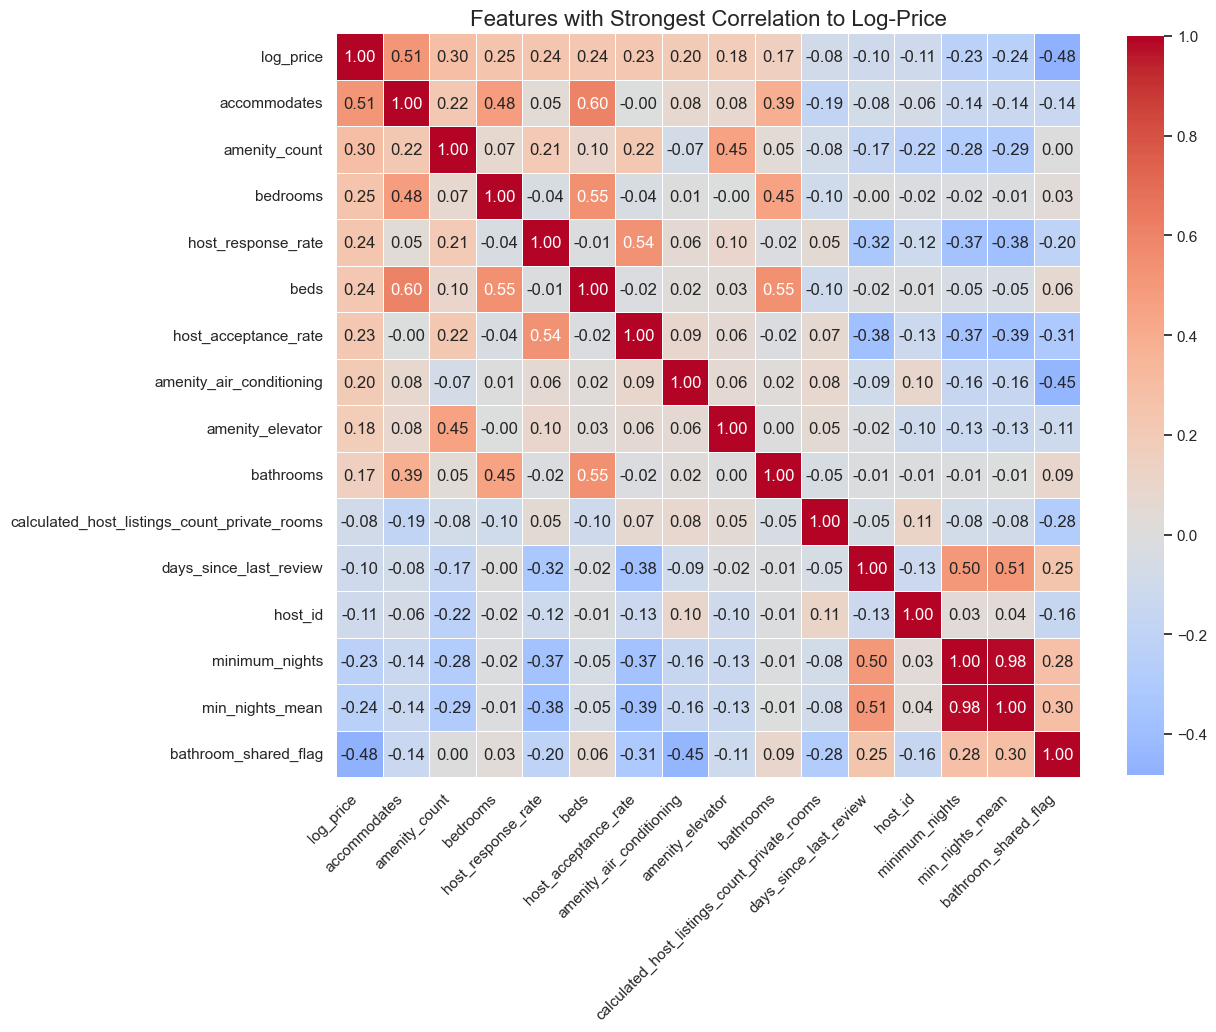

In [30]:
# Top 10 positive + Top 10 negative features 
top_corr_features = corr_with_log_price.head(11).index.tolist()
bottom_corr_features = corr_with_log_price.tail(10).index.tolist()

# Combine lists
cols_to_plot = top_corr_features + bottom_corr_features

cols_to_remove = [
    'price',                       
    'scrape_id',                   
    'neighbourhood_group_cleansed',
    'total_days',                  
    'amenity_parking'              
]

# Filter out the bad columns from our list
cols_to_plot = [c for c in cols_to_plot if c not in cols_to_remove]

# Calculate Correlation Matrix
heatmap_data = train_df[cols_to_plot].corr()

# Visualization 
plt.figure(figsize=(12, 12))

sns.heatmap(
    heatmap_data, 
    annot=True,       
    fmt=".2f",       
    cmap='coolwarm',  
    center=0,         
    linewidths=0.5,   
    square=True,     
    cbar_kws={"shrink": 0.8}
)

plt.title("Features with Strongest Correlation to Log-Price", fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.show()

## Categorical Encoding

In [31]:
# Select categorical columns
cat_cols = [
    'property_type',
    'room_type',
    'neighbourhood_cleansed',
    'host_response_time',
    'host_location',
    'neighbourhood',
]

# Replace missing categories with "Unknown"
for col in cat_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna("Unknown")
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna("Unknown")

# One-hot encode 
import pandas as pd

train_df_encoded = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)
test_df_encoded  = pd.get_dummies(test_df,  columns=cat_cols, drop_first=True)

# Align train/test columns (avoid mismatch)
train_df_encoded, test_df_encoded = train_df_encoded.align(test_df_encoded, join='left', axis=1)

## Check shape and new encoded columns
print("Original train shape:", train_df.shape)
print("Encoded train shape:", train_df_encoded.shape)

print("\nSample encoded columns:")
print([c for c in train_df_encoded.columns if 'property_type_' in c][:10])



Original train shape: (20598, 82)
Encoded train shape: (20598, 676)

Sample encoded columns:
['property_type_Boat', 'property_type_Camper/RV', 'property_type_Casa particular', 'property_type_Castle', 'property_type_Dammuso', 'property_type_Dome', 'property_type_Earthen home', 'property_type_Entire bed and breakfast', 'property_type_Entire bungalow', 'property_type_Entire cabin']


## Missing Value Imputation

In [32]:
# Identify numeric and boolean columns
numeric_cols = train_df_encoded.select_dtypes(include=['number']).columns
bool_cols = train_df_encoded.select_dtypes(include=['boolean']).columns

# Fill numeric NaNs with median
for col in numeric_cols:
    median_val = train_df_encoded[col].median()
    train_df_encoded[col] = train_df_encoded[col].fillna(median_val)
    test_df_encoded[col]  = test_df_encoded[col].fillna(median_val)

# Fill boolean NaNs with False
for col in bool_cols:
    train_df_encoded[col] = train_df_encoded[col].fillna(False)
    test_df_encoded[col]  = test_df_encoded[col].fillna(False)

# All remaining NaNs (categorical leftovers) → 0
train_df_encoded = train_df_encoded.fillna(0)
test_df_encoded  = test_df_encoded.fillna(0)

print("Missing values filled. Remaining NaNs in train:",
      train_df_encoded.isna().sum().sum())
print("Missing values filled. Remaining NaNs in test:",
      test_df_encoded.isna().sum().sum())

/var/folders/fr/m_3mjrmn62d0n8qqzk2yw_mm0000gn/T/ipykernel_39009/3592111061.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df_encoded[col]  = test_df_encoded[col].fillna(False)


Missing values filled. Remaining NaNs in train: 0
Missing values filled. Remaining NaNs in test: 0


## Final Feature / Target Split

In [33]:
# Target: log-transformed price
y = train_df_encoded['log_price']

# Drop target and ID-like columns
drop_cols = ['price', 'log_price', 'id', 'host_id', 'scrape_id']

# Train features: only numeric + bool
X = (
    train_df_encoded
    .drop(columns=[col for col in drop_cols if col in train_df_encoded.columns])
    .select_dtypes(include=['number', 'bool'])
)

# Test features: same idea
X_test = (
    test_df_encoded
    .drop(columns=[col for col in drop_cols if col in test_df_encoded.columns])
    .select_dtypes(include=['number', 'bool'])
)

print("Final numeric/bool train feature shape:", X.shape)
print("Final numeric/bool test feature shape:", X_test.shape)


Final numeric/bool train feature shape: (20598, 651)
Final numeric/bool test feature shape: (4750, 651)


In [34]:
X_test.head()

,Unnamed: 0.1,Unnamed: 0,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_tenure_days,bathrooms_clean,bathroom_shared_flag,amenity_count,amenity_wifi,amenity_air_conditioning,amenity_kitchen,amenity_heating,amenity_washer,amenity_dryer,amenity_parking,amenity_tv,amenity_elevator,amenity_pool,review_count,days_since_last_review,total_days,available_days,min_nights_mean,max_nights_mean,booking_ratio,property_type_Boat,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Dammuso,property_type_Dome,property_type_Earthen home,property_type_Entire bed and breakfast,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire chalet,property_type_Entire condo,property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire home/apt,property_type_Entire loft,property_type_Entire place,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire vacation home,property_type_Entire villa,property_type_Farm stay,property_type_Holiday park,property_type_Houseboat,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in cabin,property_type_Private room in casa particular,property_type_Private room in condo,property_type_Private room in cottage,property_type_Private room in farm stay,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in home,property_type_Private room in hostel,property_type_Private room in houseboat,property_type_Private room in island,property_type_Private room in loft,property_type_Private room in nature lodge,property_type_Private room in pension,property_type_Private room in rental unit,property_type_Private room in ryokan,property_type_Private room in serviced apartment,property_type_Private room in tiny home,property_type_Private room in tower,property_type_Private room in townhouse,property_type_Private room in treehouse,property_type_Private room in trullo,property_type_Private room in vacation home,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in bed and breakfast,property_type_Room in boutique hotel,property_type_Room in heritage hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in farm stay,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in hotel,property_type_Shared room in loft,property_type_Shared room in rental unit,property_type_Shared room in ryokan,property_type_Shared room in tiny home,property_type_Shared room in treehouse,property_type_Shared room in villa,property_type_Shipping container,property_type_Tent,property_type_Tiny home,property_type_Tipi,property_type_Tower,property_type_Treehouse,property_type_Windmill,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_Arnavutkoy,neighbourhood_cleansed_Atasehir,neighbourhood_cleansed_Avcilar,neighbourhood_cleansed_Bagcilar,neighbourhood_cleansed_Bahcelievler,neighbourhood_cleansed_Bakirkoy,neighbourhood_cleansed_Basaksehir,neighbourhood_cleansed_Bayrampasa,neighbourhood_cleansed_Besiktas,neighbourhood_cleansed_Beykoz,neighbour

In [35]:
import joblib

os.makedirs('../data', exist_ok=True)

# Target
y = train_df_encoded['log_price']

# Drop target
drop_cols = [
    'log_price', 
    'price', 
    'id', 
    'host_id', 
    'scrape_id', 
    'neighbourhood_group_cleansed',
    'amenity_parking',             
    'total_days'                   
]

# Train features
X = (
    train_df_encoded
    .drop(columns=[c for c in drop_cols if c in train_df_encoded.columns])
    .select_dtypes(include=['number', 'bool'])
)

# Test features
X_test = (
    test_df_encoded
    .drop(columns=[c for c in drop_cols if c in test_df_encoded.columns])
    .select_dtypes(include=['number', 'bool'])
)

print("X shape     :", X.shape)
print("y shape     :", y.shape)
print("X_test shape:", X_test.shape)

# Save
joblib.dump(X, '../data/X.joblib')
joblib.dump(y, '../data/y.joblib')
joblib.dump(X_test, '../data/X_test.joblib')
joblib.dump(test_ids, '../data/test_ids.joblib')

print("X, y, X_test, test_ids saved successfully.")



X shape     : (20598, 648)
y shape     : (20598,)
X_test shape: (4750, 648)
X, y, X_test, test_ids saved successfully.
